<a href="https://colab.research.google.com/github/aliabdollahy/PCA2S/blob/master/TimeseriesGenerator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

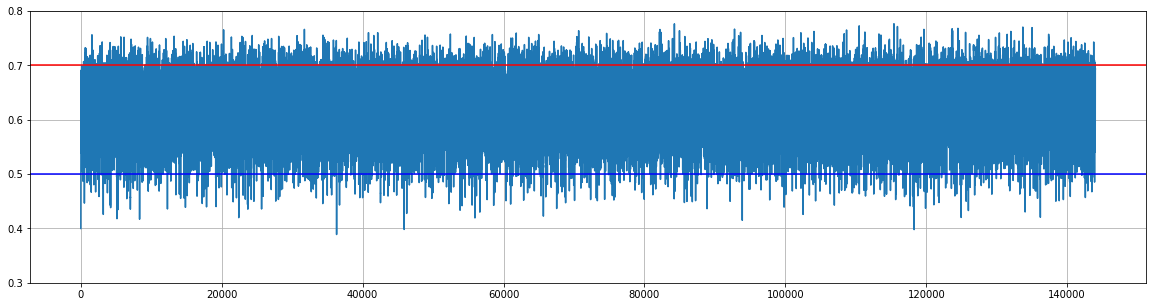

In [0]:
import numpy as np
import random
import matplotlib.pyplot as plt
import math
ds = []
# ds_len: (minute, hour, day)  
ds_len = 1 * 60 * 24 * 100 # dataset for 100 days 
# ds_len = 256 
# for i in range(ds_len):
#   devide_factor = random.randrange(10, 15)
#   factor = ((2*math.sin(i/40) - 3*math.cos(i/80) + 4 * math.sin(i/80) - 3*math.sin(i/80)) + 7)/devide_factor
#   rand_min_rand = random.uniform(-0.05, -0.01) 
#   rand_max_rand = random.uniform(0.01, 0.05)
#   new_val = factor + random.uniform(rand_min_rand, rand_max_rand)
#   ds.append(new_val)
import time
flag = 'up'
up_tresh = 0.7
down_tresh = 0.4
ds.append(0.4)
for i in range(ds_len):
  last_list_val = ds[-1]
  if flag == 'up':
    new_val = random.uniform(last_list_val - 0.01, last_list_val + 0.03)
    if new_val > up_tresh:
      flag = 'down'
  if flag == 'down':
    new_val = random.uniform(last_list_val - 0.03, last_list_val + 0.01)
    if new_val < down_tresh:
      flag='up'
  up_tresh = random.uniform(0.65, 0.80)
  down_tresh = random.uniform(0.3, up_tresh - 0.1)
  ds.append(new_val)


plt.figure(figsize=(20,5))


plt.grid(True)
plt.plot(ds, '-')
plt.ylim((0.3, 0.8))

plt.axhline(y=0.7, color='r', linestyle='-')
plt.axhline(y=0.5, color='b', linestyle='-')
plt.show()

In [0]:
from openpyxl import Workbook
from google.colab import files

  
# Workbook is created 
wb = Workbook() 
  
ws = wb.active  
# add_sheet is used to create sheet. 

ws['A1'] = "index"
ws['B1'] = "load"

for i in range(len(ds)):  
  ws['A'+ str(i+1)] = i + 1
  ws['B'+ str(i+1)] = ds[i]

   

  
wb.save('dataset.xlsx')
files.download('dataset.xlsx') 
